Imports

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtl
from sklearn import linear_model
from joblib import dump, load

League Params

In [23]:
league = 'Premiere_League'
league_short = 'epl'
season = '_2022_23'

Constantes

In [24]:
MAIN_PATH = '/content/drive/MyDrive/'
stats_path = MAIN_PATH + 'Data_Football/' + league + '/Stats/' + league + season + '_stats.csv'
model_path = MAIN_PATH + 'Data_Football/' + league + '/Model/' + league_short + '_model.joblib'

Functions

In [25]:
functions_path = MAIN_PATH + 'Colab Notebooks/Bet_Functions.ipynb'

%run '{functions_path}'

Init plot

In [26]:
mtl.rcParams['axes.grid'] = 'True'
mtl.rcParams['axes.spines.top'] = 'False'
mtl.rcParams['axes.spines.right'] = 'False'
mtl.rcParams['xtick.labelsize'] = 20
mtl.rcParams['ytick.labelsize'] = 20

Abrir stats

In [27]:
df_stats= pd.read_csv(stats_path)
df_stats

,Unnamed: 0,team,shots,shots_ot,shots_vs,shots_ot_vs,points,form
0,0,BRENTFORD,397,162,561,205,59,12
1,1,BOURNEMOUTH,355,133,626,206,39,3
2,2,ARSENAL,593,204,341,136,84,9
3,3,MANCITY,603,219,293,96,89,10
4,4,SOUTHAMPTON,417,142,525,158,25,1
5,5,LIVERPOOL,605,212,369,160,67,11
6,6,BRIGHTON,612,231,388,133,62,7
7,7,MANUNITED,592,214,481,145,75,12
8,8,EVERTON,429,152,575,193,36,8
9,9,LEEDS,465,145,527,193,31,1


Correlation Points vs Shots

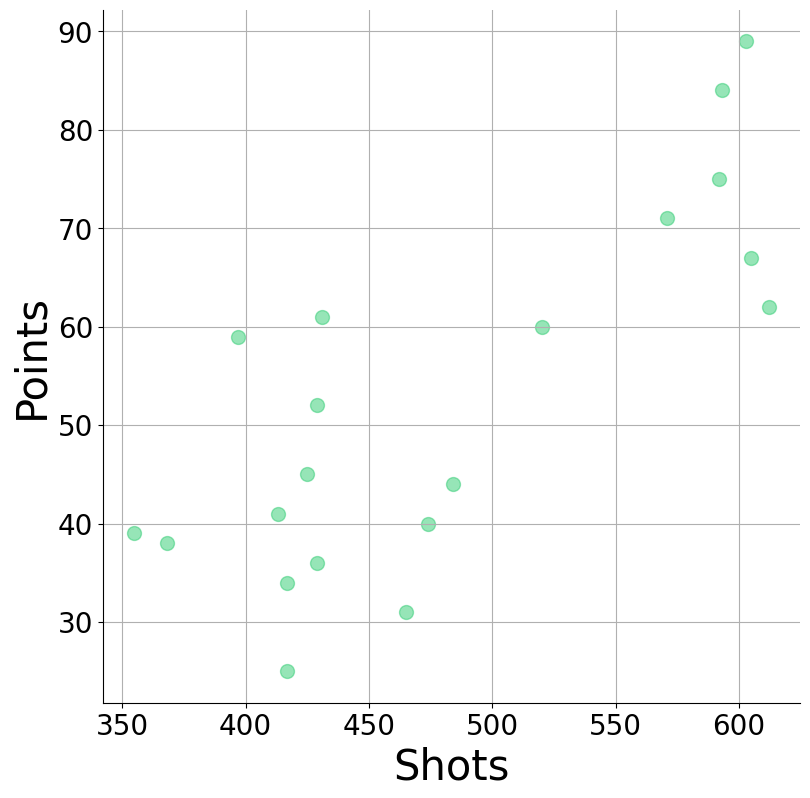

In [28]:
fig, ax = plt.subplots(figsize=(9,9))

plt.scatter(df_stats.shots, df_stats.points, s=100, alpha=0.5, c= "#2ECC71" )
ax.set_ylabel('Points', fontsize=30)
ax.set_xlabel('Shots', fontsize=30)

plt.show()

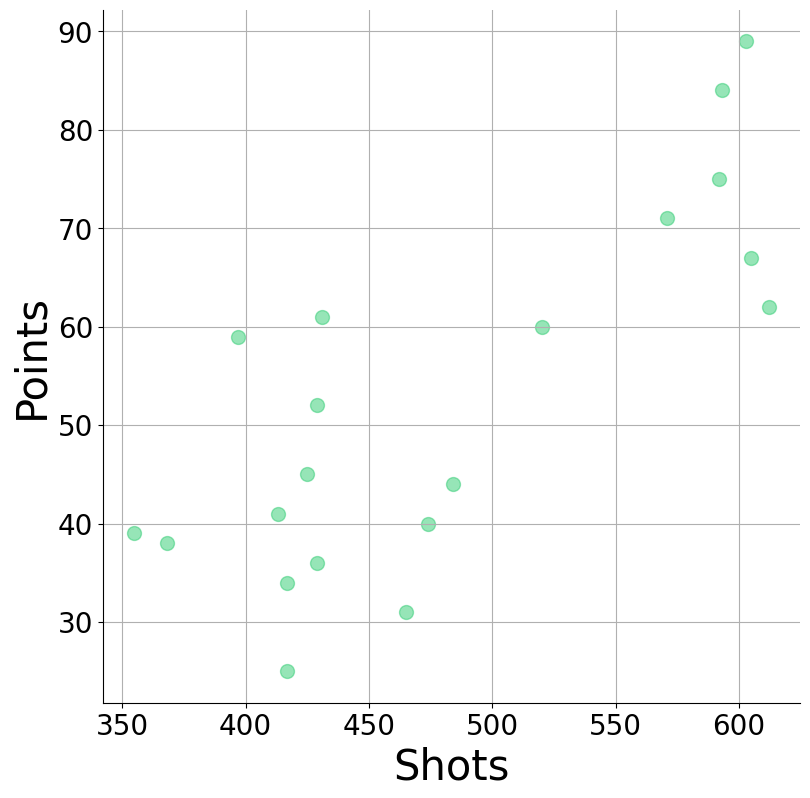

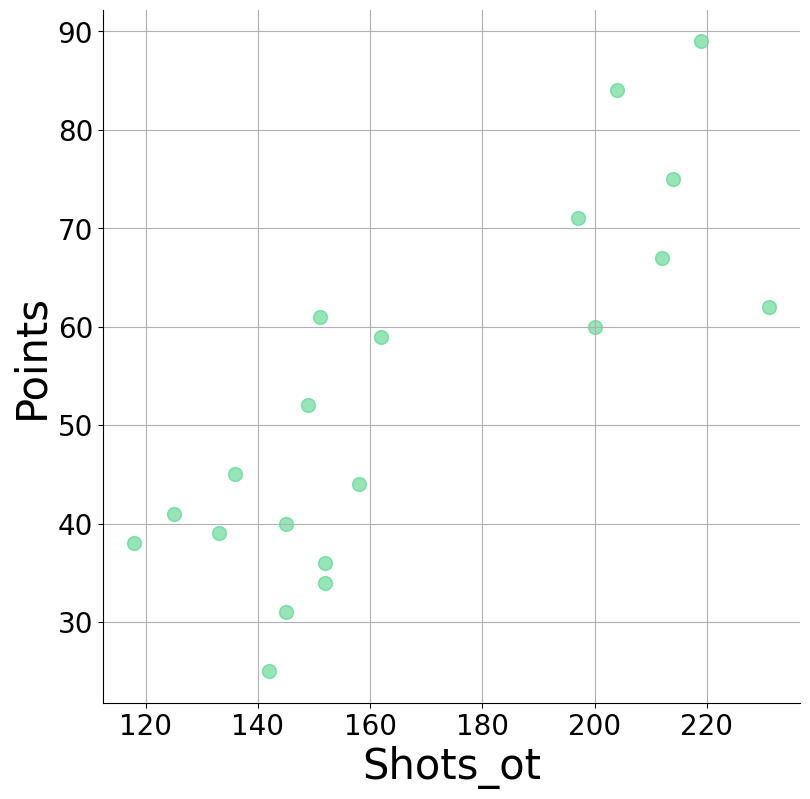

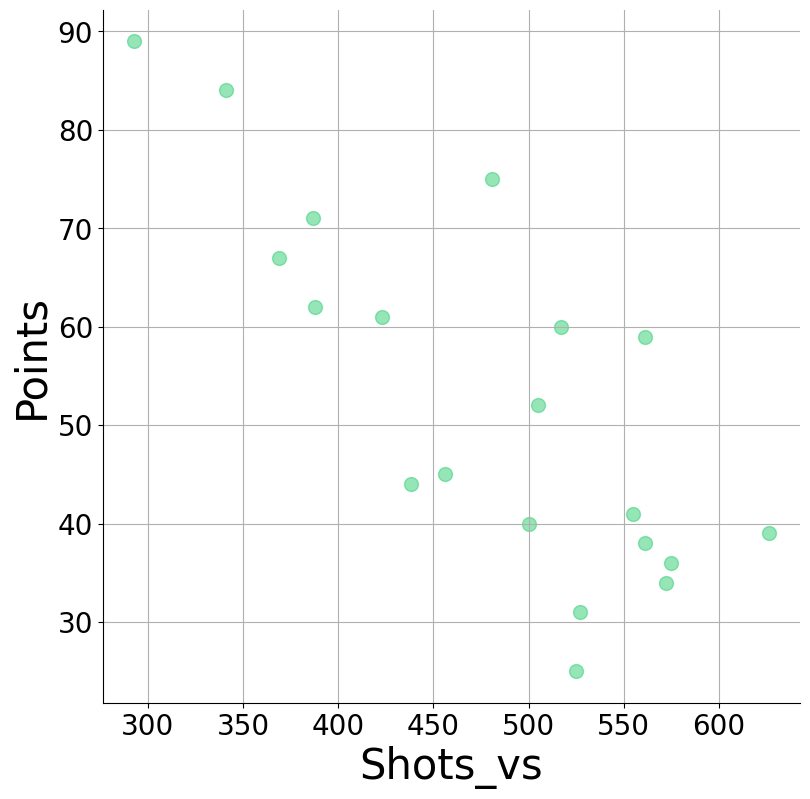

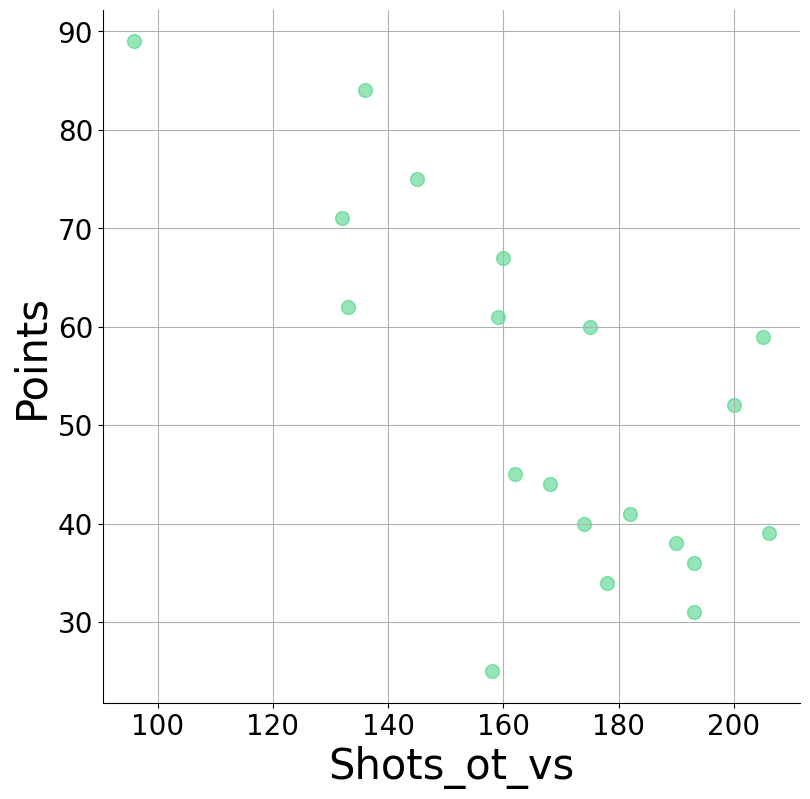

In [29]:
features = ['shots','shots_ot','shots_vs','shots_ot_vs']

for feat in features:
  fig, ax = plt.subplots(figsize=(9,9))

  plt.scatter(df_stats[feat], df_stats.points, s=100, alpha=0.5, c= "#2ECC71" )
  ax.set_ylabel('Points', fontsize=30)
  ax.set_xlabel(feat.capitalize(), fontsize=30)

  plt.show()

Model Training

In [30]:
features = df_stats[['shots','shots_ot','shots_vs','shots_ot_vs']]

target = df_stats['points']

regr = linear_model.LinearRegression(fit_intercept=False)

model = regr.fit(features, target)

model.score(features, target)

0.7301969524830908

Escreve o modelo no disco

In [31]:
dump (model, model_path)

['/content/drive/MyDrive/Data_Football/Premiere_League/Model/epl_model.joblib']